# Iris dataset in scikit-learn

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

150 samples and 4 features

In [7]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Iris dataset EDA
X - features (predictor variables)<br>
y - target

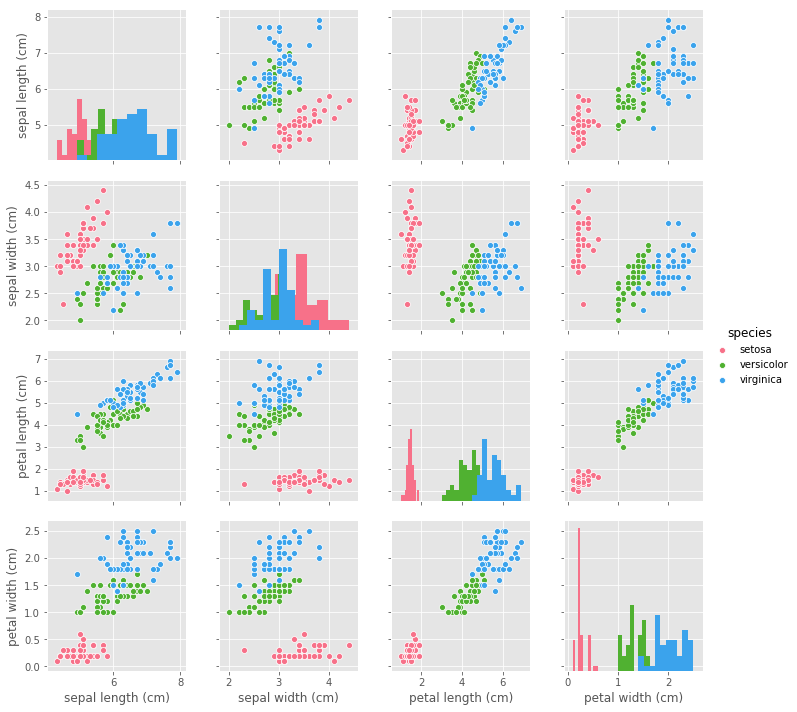

In [9]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [ iris.target_names[i] for i in iris.target]

sns.pairplot(df, hue='species', palette='husl', diag_kind='hist');

# k-Nearest Neighbors Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate knn classifer with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [11]:
iris['data'].shape

(150, 4)

In [12]:
iris['target'].shape

(150,)

## Fit
**features**: numpy array or pandas, and contain continuous values, no NAs<br>
**target**: label

In [13]:
# fitting: train, target
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

## Predict

In [14]:
X_new = np.array([[5.2, 2.8, 1.5, 0.4],
                [5.6, 2.8, 3.9, 1.1],
                [6.1, 3.1, 5.7, 1.6]])

In [17]:
prediction = knn.predict(X_new)

print('Prediction: {}'.format(prediction))
print([ iris.target_names[i] for i in prediction])

Prediction: [0 1 2]
['setosa', 'versicolor', 'virginica']


# Measuring Model Performance

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)

# fit the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


### Test the accuracy

In [20]:
knn.score(X_test, y_test)

0.9555555555555556

### Model complexity
- Larger k = smoother decision boundary = less complex model (Smoother and less curvy when drawing the decision boundary)
- Smaller k = more complex model = can lead to 'overfitting'

Generally, complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data aka overfitting